Building 2 Convolutional neural networks (CNN) with early stopping using the MNIST dataset and comparing the number of filters and kernels on each one to see which compares better.

Each CNN consists of: Three 2D convolutional layers with 3x3 kernels, where each one of the first two is followed by a 2x2 max polling layer and for the classification part of the model I used two fully connected layers.


In [1]:
# initial imports
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense
from functools import partial

# global variables
seed = 42

C:\Users\nomad\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# loading the data
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
# spliting the training set to 5/6 of the original and normalizing it by scaling down the pixels to 0-1 values
X_train = X_train_full[:-10000]/255
y_train = y_train_full[:-10000]
# same for the validation set
X_valid = X_train_full[-10000:]/255
y_valid = y_train_full[-10000:]
# test set is already split, just normalizing the pixels
X_test = X_test/255

In [5]:
X_train.shape

(50000, 28, 28)

In [6]:
# reshape the input data to 28,28,1
X_train = X_train.reshape((-1, 28, 28, 1))
X_valid = X_valid.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

In [7]:
# setting the seed
tf.random.set_seed(42)

# setting the defautl convolutional layer
DefaultConv2D = partial(tf.keras.layers.Conv2D,
                        kernel_size = 3,
                        padding = "same",
                        activation = "relu",
                        kernel_initializer = "he_normal")

# creating the model with the aforementioned paramteres
model = tf.keras.Sequential([
    DefaultConv2D(filters = 16,
                  kernel_size = 3,
                  input_shape = [28, 28, 1]),
    tf.keras.layers.MaxPooling2D((2, 2)),
    DefaultConv2D(filters = 32),
    tf.keras.layers.MaxPooling2D((2, 2)),
    DefaultConv2D(filters = 64),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128,
                          activation = "relu",
                          kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(units = 10,activation = "softmax")
])

C:\Users\nomad\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# compiling the model
model.compile(optimizer = "Adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [9]:
#setting the early stopping with the aforementioned parameters
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                  patience = 5,
                                                  restore_best_weights = True)

history = model.fit(X_train,
                    y_train,
                    epochs = 100,
                    batch_size = 32,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping]
                    )

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8850 - loss: 0.3522 - val_accuracy: 0.9842 - val_loss: 0.0539
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9820 - loss: 0.0552 - val_accuracy: 0.9879 - val_loss: 0.0406
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9888 - loss: 0.0349 - val_accuracy: 0.9876 - val_loss: 0.0426
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9915 - loss: 0.0258 - val_accuracy: 0.9822 - val_loss: 0.0623
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9927 - loss: 0.0204 - val_accuracy: 0.9889 - val_loss: 0.0436
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9948 - loss: 0.0155 - val_accuracy: 0.9863 - val_loss: 0.0588
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9949 - loss: 0.0146 - val_accuracy: 0.9875 - val_loss: 0.0538


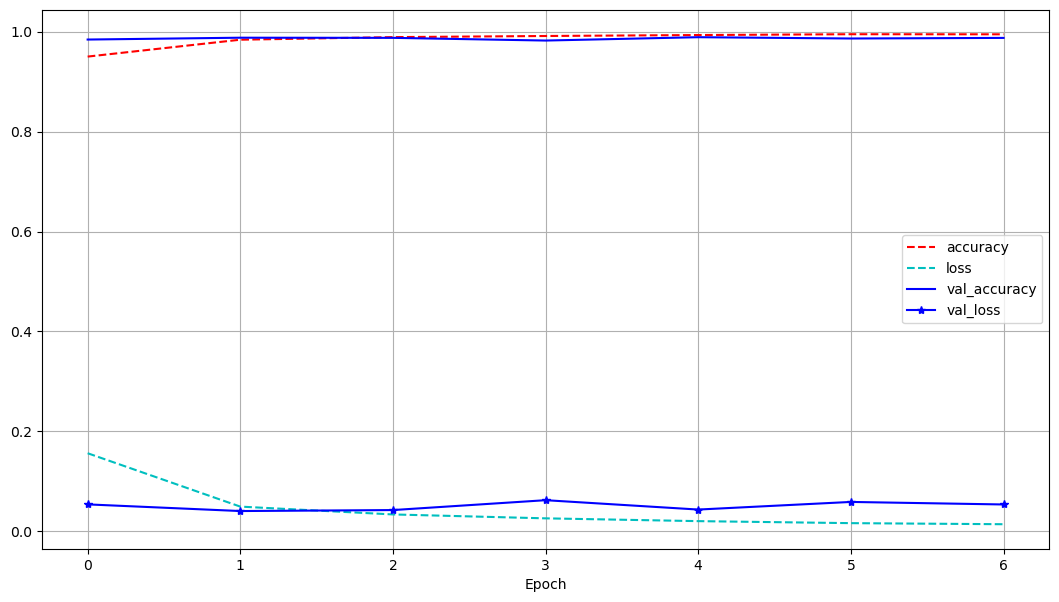

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

def nn_plot(this_history):
  pd.DataFrame(this_history.history).plot(
      figsize = (13, 7), grid = True, xlabel = "Epoch",
      style = ["r--", "c--", "b-", "b-*"])
  plt.show()

nn_plot(history)

In [11]:
# evaluating the accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nThe accuracy on the test set is: {100*test_accuracy:.1f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9842 - loss: 0.0455

The accuracy on the test set is: 98.9%


In [12]:
# setting the defautl convolutional layer
DefaultConv2D = partial(tf.keras.layers.Conv2D,
                        kernel_size = 2,
                        padding = "same",
                        activation = "relu",
                        kernel_initializer = "he_normal")

# creating the model with the aforementioned paramteres
model = tf.keras.Sequential([
    DefaultConv2D(filters = 8,
                  kernel_size = 2,
                  input_shape = [28, 28, 1]),
    tf.keras.layers.MaxPooling2D((2, 2)),
    DefaultConv2D(filters = 16),
    tf.keras.layers.MaxPooling2D((2, 2)),
    DefaultConv2D(filters = 32),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 64,
                          activation = "relu",
                          kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(units = 10,activation = "softmax")
])

C:\Users\nomad\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# compiling the model
model.compile(optimizer = "Adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [14]:
#setting the early stopping with the aforementioned parameters
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                  patience = 5,
                                                  restore_best_weights = True)

history_2 = model.fit(X_train,
                    y_train,
                    epochs = 100,
                    batch_size = 32,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping]
                    )

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8262 - loss: 0.5628 - val_accuracy: 0.9735 - val_loss: 0.0872
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9726 - loss: 0.0898 - val_accuracy: 0.9785 - val_loss: 0.0694
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9802 - loss: 0.0646 - val_accuracy: 0.9799 - val_loss: 0.0638
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9844 - loss: 0.0518 - val_accuracy: 0.9836 - val_loss: 0.0557
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9872 - loss: 0.0413 - val_accuracy: 0.9843 - val_loss: 0.0547
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9892 - loss: 0.0333 - val_accuracy: 0.9831 - val_loss: 0.0580
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9911 - loss: 0.0274 - val_accuracy: 0.9834 - val_loss: 0.0618
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9924 - loss: 

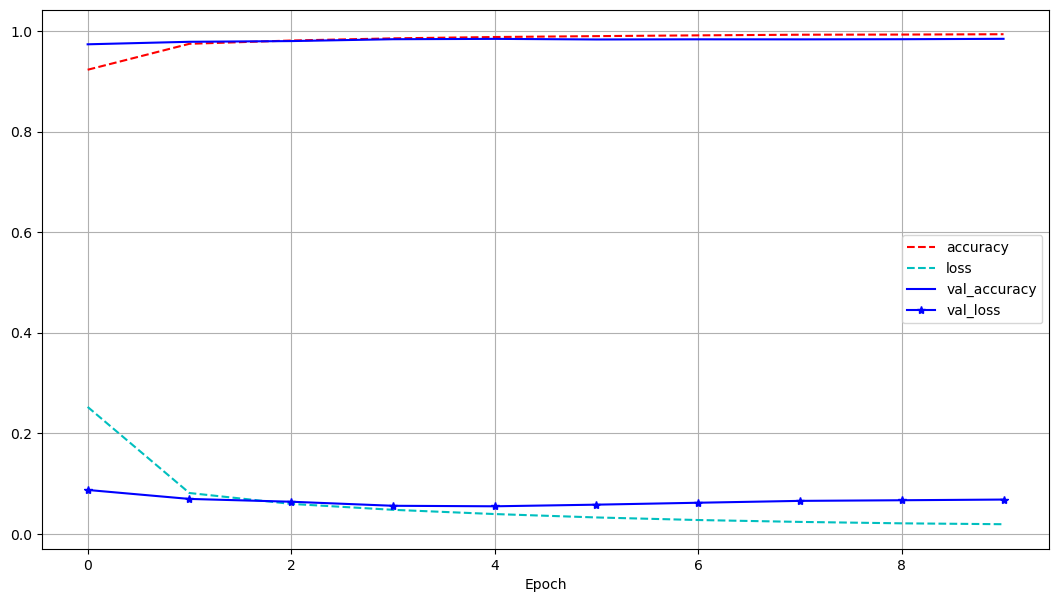

In [15]:
nn_plot(history_2)

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nThe accuracy on the test set is: {100*test_accuracy:.1f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9834 - loss: 0.0506

The accuracy on the test set is: 98.7%


The convolutional 2D layers seem to work way better for the mnist data than the hidden layers with a ReLU activation function. Also while reducing the filters and the kernel not only we did get better compiling times we also got a very good model.